<div style='background-image: url("../share/Aerial_view_LLNL.jpg") ; padding: 0px ; background-size: cover ; border-radius: 15px ; height: 250px; background-position: 0% 80%'>
    <div style="float: right ; margin: 50px ; padding: 20px ; background: rgba(255 , 255 , 255 , 0.8) ; width: 50% ; height: 150px">
        <div style="position: relative ; top: 50% ; transform: translatey(-50%)">
            <div style="font-size: xx-large ; font-weight: 900 ; color: rgba(0 , 0 , 0 , 0.9) ; line-height: 100%">2014 South Napa Earthquake</div>
            <div style="font-size: large ; padding-top: 20px ; color: rgba(0 , 0 , 0 , 0.7)">Large Scale Downloading Exercise</div>
        </div>
    </div>
</div>

### **2017 CIG-LLNL Computational Seismology Workshop**


##### Authors:
* Artie Rogers
* Lion Krischer ([@krischer](https://github.com/krischer))
---

This notebooks aims to teach you how to use ObsPy to download a larger data-set that you can then use for example for seismic inversions, sources studies, or whatever else suits your fancy. In this example we will download waveform and station data in certain geographical region for the South Napa earthquake.

In [1]:
%matplotlib inline
from __future__ import print_function
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = 12, 8

### Event Data

The first step again is do find the event.

1 Event(s) in Catalog:
2014-08-24T10:20:44.070000Z | +38.215, -122.312 | 6.02 mw | manual


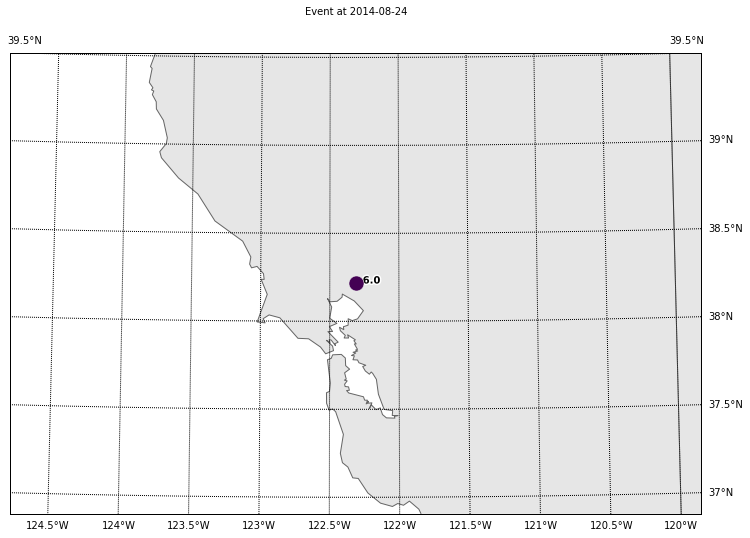

In [2]:
# You shopuld be able to do this by yourself by now. Best use the 
# USGS FDSN web service but others might work as well.
import obspy
from obspy.clients.fdsn import Client

client = Client("USGS")
t = obspy.UTCDateTime("2014-08-24T10:20:44.0")  # South Napa earthquake
cat = client.get_events(starttime=t - 100, endtime=t + 3600,
                        minmagnitude=6)

# Print and plot event.
print(cat)
cat.plot(projection="local", resolution="i");

### Waveform and Station Data

You could once again write loops and manually download waveforms and corresponding station files like seen in the previous exercises. This quickly gets tedious and error prone, especially if one wants to incorporate data from multiple data centers.

To this end IRIS developed the so-called [Federator](https://ds.iris.edu/ds/newsletter/vol17/no2/444/introducing-the-iris-federator-time-series-data-search-across-global-data-centers/) which enables you to figure out which data centers hosts what data. The counter-part for the European ORFEUS consortium is the [EIDAWS Routing service](http://www.orfeus-eu.org/data/eida/webservices/routing/). Unfortunately we did not manage to get support for these into ObsPy in time for this workshop. But it will happen very soon.

Chad will talk more about the federator in the afternoon.


#### Mass Downloader

ObsPy has a submodule to help with this, the mass downloader. It attempts to offer an API for how seismologists would like to download data. It works in three steps:

1. Define Geographical Domain
2. Define Other Restrictions
3. Launch Download

After this it fully automatically downloads across all data centers it knows of. Many seismologist want to solve a problem on Earth an don’t care that much where the data actually comes from. Additionally it has a couple of other nice features:

* Automatic Quality Control
* Define Other Restrictions
* Relaunch Downloads
* One always need waveform data and station meta information
* Acquire a “nice and complete” dataset
* Usable as a library


#### Exercise


##### Part A

Use the mass downloader to download data for a small (there are a lot of stations in this region) geographical region (a circular region with a radius of 1 degree is an example), including the station information, with the mass downloader. Download from 2 minutes before the event to 10 minutes after it and download only `LHZ` channels.

**The documentation is your friend. So is just searching the internet.**

In [3]:
import obspy
from obspy.clients.fdsn.mass_downloader import CircularDomain, \
    Restrictions, MassDownloader


# First, define a domain.
domain = CircularDomain(latitude=cat[0].origins[0].latitude,
                        longitude=cat[0].origins[0].longitude,
                        minradius=0.0, maxradius=1.0)

# Second, define some additional restrictions.
restrictions = Restrictions(starttime=cat[0].origins[0].time - 2 * 60,
                            endtime=cat[0].origins[0].time + 10 * 60,
                            minimum_interstation_distance_in_m=10E3,
                            channel="LHZ")

# If you leave the providers empty it will loop through
# all data centers it knows.
# It will prefer data from the first providers.
mdl = MassDownloader(providers=["SCEDC", "NCEDC", "IRIS"])

# Finally launch it.
mdl.download(domain, restrictions,
             mseed_storage="waveforms",
             stationxml_storage="stations")

[2017-09-17 19:21:48,238] - obspy.clients.fdsn.mass_downloader - INFO: Initializing FDSN client(s) for SCEDC, NCEDC, IRIS.
[2017-09-17 19:21:53,384] - obspy.clients.fdsn.mass_downloader - INFO: Successfully initialized 3 client(s): SCEDC, NCEDC, IRIS.
[2017-09-17 19:21:53,386] - obspy.clients.fdsn.mass_downloader - INFO: Total acquired or preexisting stations: 0
[2017-09-17 19:21:53,387] - obspy.clients.fdsn.mass_downloader - INFO: Client 'SCEDC' - Requesting unreliable availability.
[2017-09-17 19:21:56,729] - obspy.clients.fdsn.mass_downloader - INFO: Client 'SCEDC' - Successfully requested availability (3.34 seconds)
[2017-09-17 19:21:56,733] - obspy.clients.fdsn.mass_downloader - INFO: Client 'SCEDC' - Found 15 stations (15 channels).
[2017-09-17 19:21:56,734] - obspy.clients.fdsn.mass_downloader - INFO: Client 'SCEDC' - Will attempt to download data from 15 stations.
[2017-09-17 19:21:56,737] - obspy.clients.fdsn.mass_downloader - INFO: Client 'SCEDC' - Status for 15 time interval

[2017-09-17 19:22:30,494] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Found 3 stations (3 channels).
[2017-09-17 19:22:30,496] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - No new data available after discarding based on the minimal inter-station distance.
[2017-09-17 19:22:30,498] - obspy.clients.fdsn.mass_downloader - INFO: ============================== Final report
[2017-09-17 19:22:30,499] - obspy.clients.fdsn.mass_downloader - INFO: 0 MiniSEED files [0.0 MB] already existed.
[2017-09-17 19:22:30,500] - obspy.clients.fdsn.mass_downloader - INFO: 0 StationXML files [0.0 MB] already existed.
[2017-09-17 19:22:30,502] - obspy.clients.fdsn.mass_downloader - INFO: Client 'SCEDC' - Acquired 4 MiniSEED files [0.0 MB].
[2017-09-17 19:22:30,503] - obspy.clients.fdsn.mass_downloader - INFO: Client 'SCEDC' - Acquired 4 StationXML files [0.0 MB].
[2017-09-17 19:22:30,505] - obspy.clients.fdsn.mass_downloader - INFO: Client 'NCEDC' - Acquired 5 MiniSEED files [0

{'IRIS': <obspy.clients.fdsn.mass_downloader.download_helpers.ClientDownloadHelper at 0x116d80f28>,
 'NCEDC': <obspy.clients.fdsn.mass_downloader.download_helpers.ClientDownloadHelper at 0x113364b70>,
 'SCEDC': <obspy.clients.fdsn.mass_downloader.download_helpers.ClientDownloadHelper at 0x1134ae278>}

In [4]:
!ls -l waveforms
!ls -l stations

total 280
-rw-r--r--  1 lion  staff   4096 Sep 17 19:22 BK.BDM.00.LHZ__20140824T101844Z__20140824T103044Z.mseed
-rw-r--r--  1 lion  staff   4096 Sep 17 19:22 BK.BKS.00.LHZ__20140824T101844Z__20140824T103044Z.mseed
-rw-r--r--  1 lion  staff  28672 Sep 17 19:22 BK.FARB.00.LHZ__20140824T101844Z__20140824T103044Z.mseed
-rw-r--r--  1 lion  staff   4096 Sep 17 19:22 BK.HOPS.00.LHZ__20140824T101844Z__20140824T103044Z.mseed
-rw-r--r--  1 lion  staff  28672 Sep 17 19:22 BK.JRSC.00.LHZ__20140824T101844Z__20140824T103044Z.mseed
-rw-r--r--  1 lion  staff  28672 Sep 17 19:22 BK.MCCM.00.LHZ__20140824T101844Z__20140824T103044Z.mseed
-rw-r--r--  1 lion  staff  28672 Sep 17 19:22 BK.MNRC.00.LHZ__20140824T101844Z__20140824T103044Z.mseed
-rw-r--r--  1 lion  staff   4096 Sep 17 19:22 BK.WENL.00.LHZ__20140824T101844Z__20140824T103044Z.mseed
-rw-r--r--  1 lion  staff  12288 Sep 17 19:22 PB.B057..LHZ__20140824T101844Z__20140824T103044Z.mseed
total 168
-rw-r--r--  1 lion  staff  7137 Sep 17 19:22 BK.BDM.xml
-

##### Bonus Exercise

Plot the stations and the event in a single map. Note that `obspy.read_inventory("*.xml")` does not work in ObsPy 1.0.3 (it does work in the master though...). Use the `glob` module of Python's stdlib.

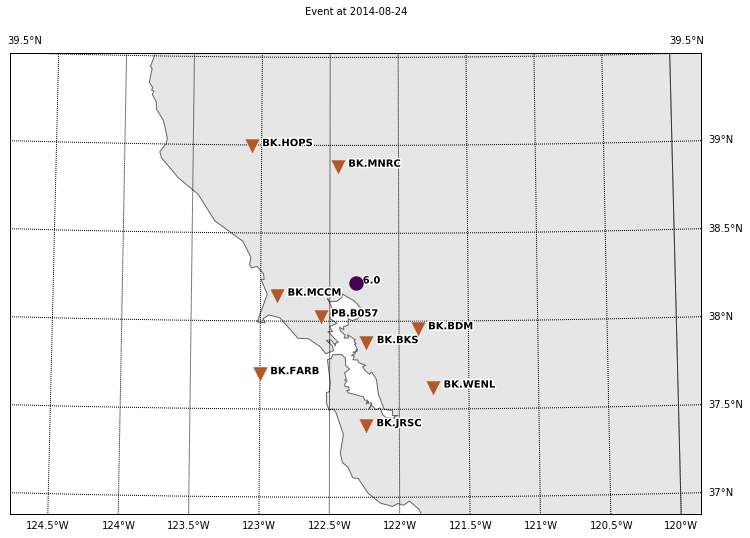

In [5]:
import glob
fig = cat.plot(projection="local", resolution="i", show=False)

# In the master you don't have to do the looping.
for filename in glob.glob("stations/*.xml"):
    obspy.read_inventory(filename).plot(fig=fig, show=False)

plt.show()

##### Part B

Process the data in the following way and store each trace in a new folder as a SAC file:

1. Instrument correction to displacement
2. Detrend and taper
3. Apply a bandpass filter from 100 to 20 seconds.
4. Sample all at exactly the same points in time at a sampling rate of 0.5 Hz.

There is a bug in ObsPy 1.0.3 with new numpy versions
(fixed in the master once again...) that will cause
an exception when running the Lanczos interpolation
after any filter. To fix it just do the following right
before the Lanczos interpolation:

```python
import numpy as np
for tr in st:
    tr.data = np.require(tr.data,
                         requirements=["C_CONTIGUOUS"])
```

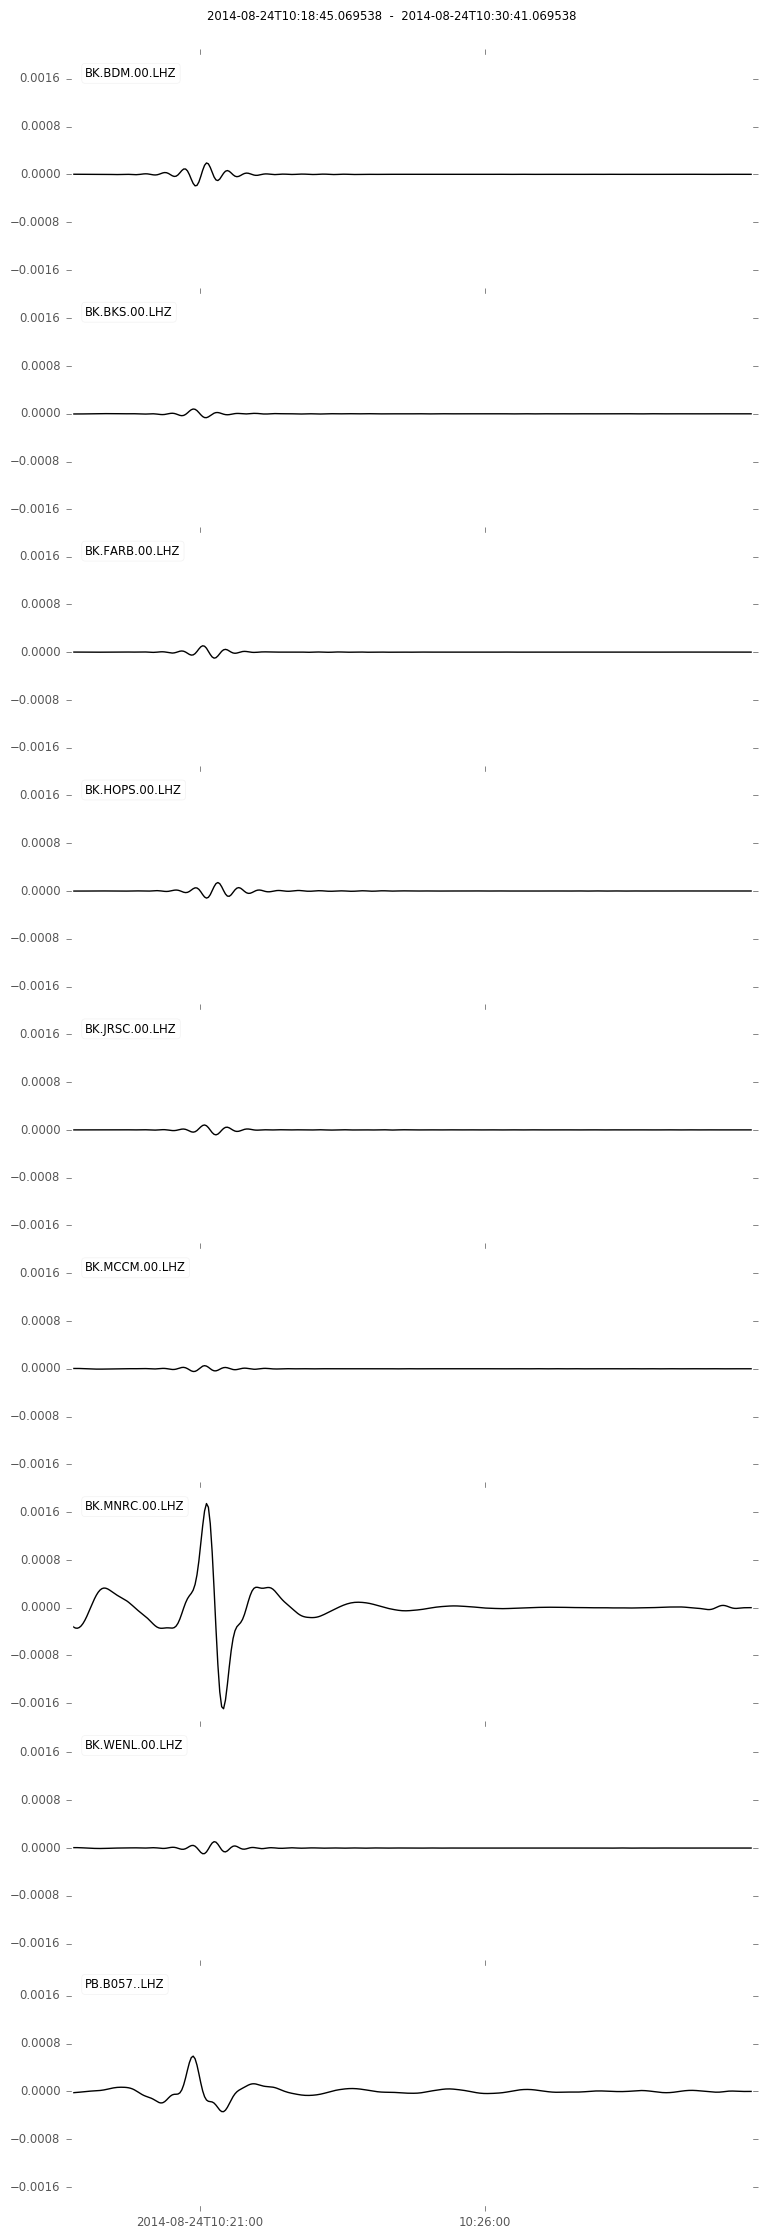

In [6]:
import glob
import os
import numpy as np

inv = obspy.Inventory(networks=[], source="")

# First read all station files.
for filename in glob.glob("./stations/*.xml"):
    inv += obspy.read_inventory(filename)
    
# Now read the waveform files.
st = obspy.read("./waveforms/*.mseed")

st.remove_response(inventory=inv, water_level=60)
st.detrend("linear")
st.taper(max_percentage=0.05)
st.filter("bandpass", freqmin=1.0/100.0, freqmax=1.0/20.0,
          zerophase=True, corners=6)

max_starttime = max(tr.stats.starttime for tr in st)
min_endtime = min(tr.stats.endtime for tr in st)
npts = int((min_endtime - max_starttime)  / 2.0)

for tr in st:
    tr.data = np.require(tr.data,
                         requirements=["C_CONTIGUOUS"])

st.interpolate(sampling_rate=0.5, method="lanczos",
               starttime=max_starttime, npts=npts, a=12)

st.plot()

# Finally write it out.
output_folder = "SAC_files"
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

for tr in st:
    filename = os.path.join(output_folder, "%s.sac" % tr.id)
    tr.write(filename=filename, format="SAC")

In [7]:
!ls SAC_files/

BK.BDM.00.LHZ.sac  BK.HOPS.00.LHZ.sac BK.MNRC.00.LHZ.sac
BK.BKS.00.LHZ.sac  BK.JRSC.00.LHZ.sac BK.WENL.00.LHZ.sac
BK.FARB.00.LHZ.sac BK.MCCM.00.LHZ.sac PB.B057..LHZ.sac
